<a href="https://colab.research.google.com/github/gspandhana/MachineLearning/blob/main/P5_Multicollinearity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-collinearity affects the prediction of a model

In this script, we will perform a multi-linear regression on the colinearity.csv dataset and compare the coefficients with those from simple linear regression of the individual predictors.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd /content/drive/My Drive/Colab Notebooks/data

/content/drive/My Drive/Colab Notebooks/data


In [ ]:
# Read the file named "colinearity.csv" into a Pandas dataframe
df = pd.read_csv('colinearity.csv')
df.head()

,x1,x2,x3,x4,y
0,-1.109823,-1.172554,-0.897949,-6.572526,-158.193913
1,0.288381,0.360526,2.298690,3.884887,198.312926
2,-1.059194,0.833067,0.285517,-1.225931,12.152087
3,0.226017,1.979367,0.744038,5.380823,190.281938
4,0.664165,-1.373739,0.317570,-0.437413,-72.681681


In [ ]:
# Choose all the predictors as the variable 'X' (note capitalization of X for multiple features)
X = df.drop(['y'],axis=1)

# Choose the response variable 'y'
y = df.y

X

,x1,x2,x3,x4
0,-1.109823,-1.172554,-0.897949,-6.572526
1,0.288381,0.360526,2.298690,3.884887
2,-1.059194,0.833067,0.285517,-1.225931
3,0.226017,1.979367,0.744038,5.380823
4,0.664165,-1.373739,0.317570,-0.437413
...,...,...,...,...
995,1.339948,0.434381,-0.524671,4.363934
996,-0.471669,-0.933721,-0.654657,-3.937106
997,0.709192,2.648024,0.275960,7.699585
998,-0.723157,0.160844,1.131939,-0.715844


In [ ]:
# Initialize a list to store the beta values for each linear regression model
linear_coef = []

# Loop over all the predictors
# In each loop "i" holds the name of the predictor
for i in X:

    # Set the current predictor as the variable x
    x = df[[i]]

    # Create a linear regression object
    linreg = LinearRegression()

    # Fit the model with training data
    # Remember to choose only one column at a time i.e. given by x (not X)
    linreg.fit(x,y)

    # Add the coefficient value of the model to the list
    linear_coef.append(linreg.coef_)
print(linear_coef)

[array([34.73442047]), array([68.63437077]), array([59.39551725]), array([20.92394348])]


### Multi-Linear Regression using all variables

In [ ]:
# Perform multi-linear regression with all predictors
multi_linear = LinearRegression()

# Fit the multi-linear regression on all features of the entire data
multi_linear.fit(X,y)

# Get the coefficients (plural) of the model
multi_coef = multi_linear.coef_
print(multi_coef)

[-24.60985028  27.71752286  37.66676682  19.27226171]


#### Printing the individual $\beta$ values

In [ ]:
print('By simple(one variable) linear regression for each variable:', sep = '\n')

for i in range(4):
    pprint(f'Value of beta{i+1} = {linear_coef[i][0]:.2f}')

By simple(one variable) linear regression for each variable:
'Value of beta1 = 34.73'
'Value of beta2 = 68.63'
'Value of beta3 = 59.40'
'Value of beta4 = 20.92'


In [ ]:
# Helper code to compare with the values from the multi-linear regression
print('By multi-Linear regression on all variables')
for i in range(4):
    pprint(f'Value of beta{i+1} = {round(multi_coef[i],2)}')



By multi-Linear regression on all variables
'Value of beta1 = -24.61'
'Value of beta2 = 27.72'
'Value of beta3 = 37.67'
'Value of beta4 = 19.27'


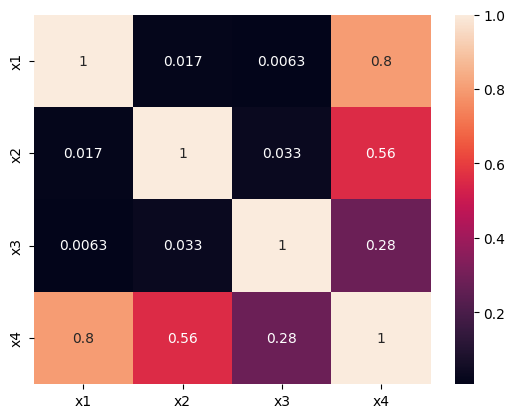

In [ ]:
# Helper code to visualize the heatmap of the covariance matrix
corrMatrix = df[['x1','x2','x3','x4']].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()
